# Installing and importing Required modules

In [ ]:

!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt 
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output


Cloning into 'yolov5'...
remote: Enumerating objects: 12313, done.
remote: Total 12313 (delta 0), reused 0 (delta 0), pack-reused 12313
Receiving objects: 100% (12313/12313), 11.52 MiB | 25.21 MiB/s, done.
Resolving deltas: 100% (8562/8562), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.4 MB/s 
     |████████████████████████████████| 145 kB 5.2 MB/s 
     |████████████████████████████████| 178 kB 46.8 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 
     |████████████████████████████████| 67 kB 5.8 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 138 kB 49.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datasci

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="O4GLCxhufbgWpVlPdVX8")
project = rf.workspace("srijan-nallamothu").project("auto-detection-kzyw0")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Auto-detection-2 in yolov5pytorch:: 100%|██████████| 300/300 [00:00<00:00, 702.65it/s]


#  Train YOLO v5 model

In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Auto-detection-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-75-g9c1e91a torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr

# Detecting the test images from the Trained weights

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Auto-detection-2/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-75-g9c1e91a torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/15 /content/datasets/Auto-detection-2/test/images/Datacluster-Auto--10-_jpg.rf.df513d27636a6aa3103eb6ee79f449b5.jpg: 416x416 2 Autos, Done. (0.029s)
image 2/15 /content/datasets/Auto-detection-2/test/images/Datacluster-Auto--115-_jpg.rf.2d942cade22ea42e4357028cf309fdf3.jpg: 416x416 1 Auto, Done. (0.028s)
image 3/15 /content/datasets/Auto-

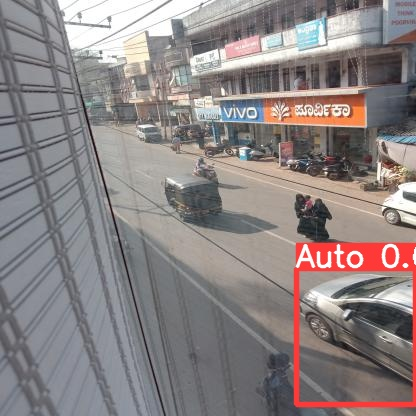

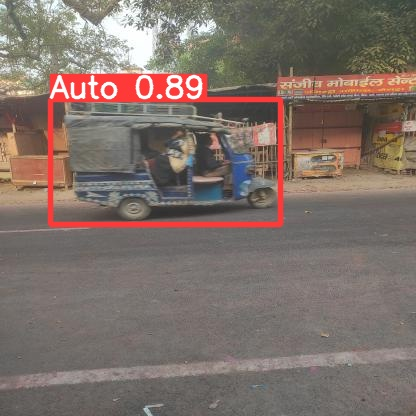

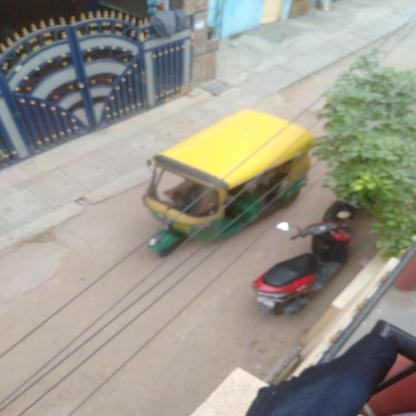

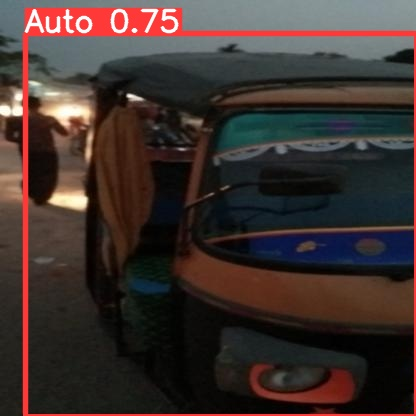

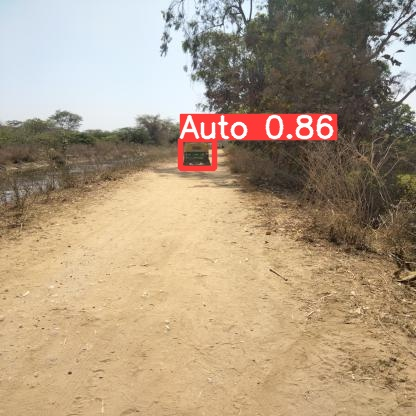

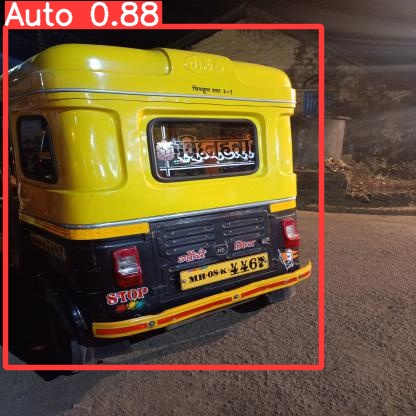

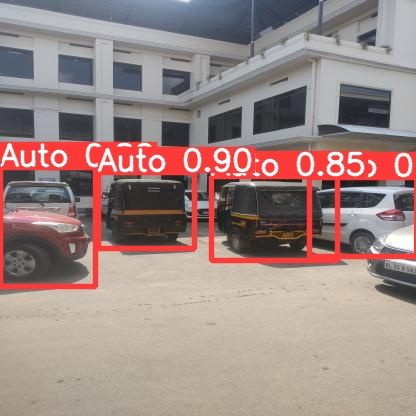

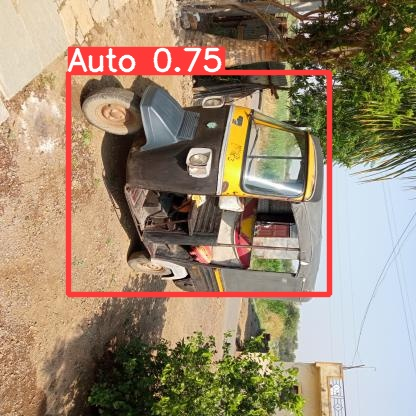

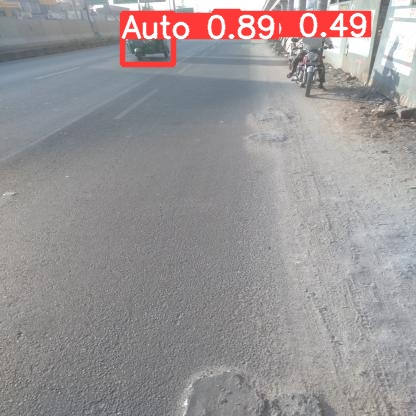

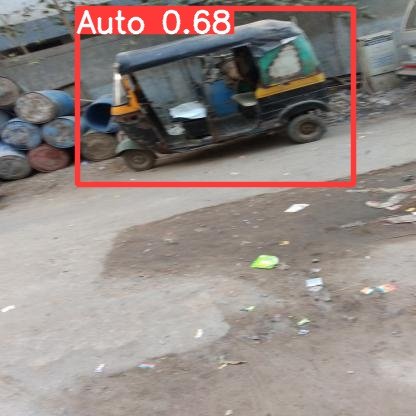

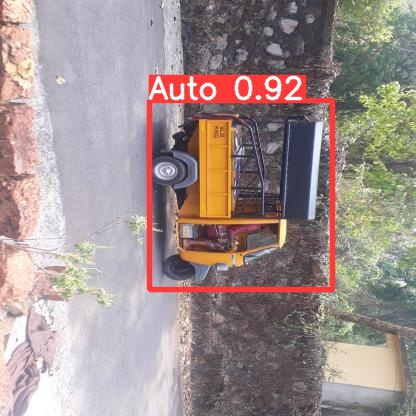

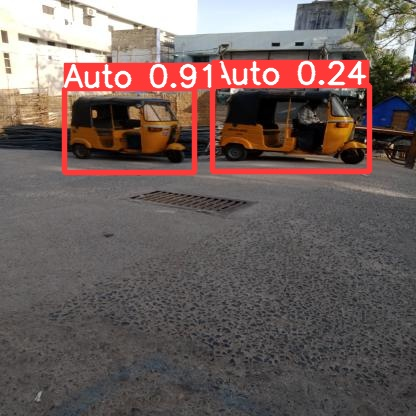

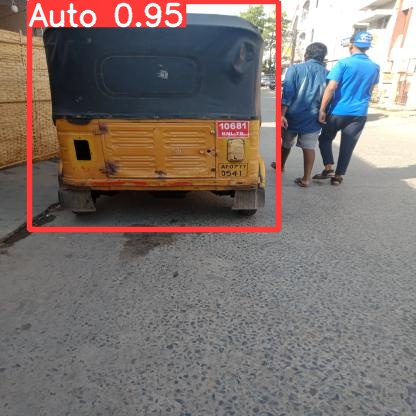

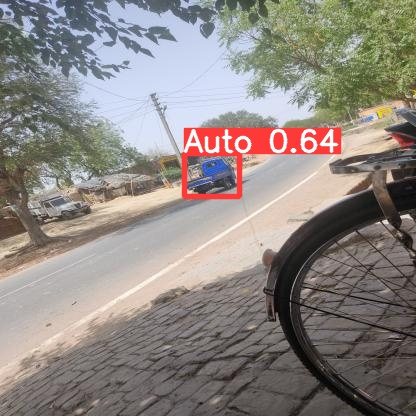

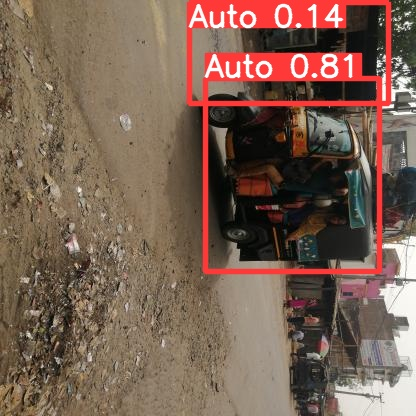

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#Downloading test images

from google.colab import files

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): 
    
    files.download(filename=imageName)